# import


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from scipy.signal import medfilt, savgol_filter
from scipy.fftpack import fft, ifft

import pywt 
from pykalman import KalmanFilter


In [5]:
# https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice

file_path = 'data/contraceptive.dat'

columns = [
    'Wife_age', 'Wife_education', 'Husband_education', 'Children', 'Wife_religion', 'Wife_working', 'Husband_occupation', 'Standard-of-living', 'Media_exposure' , 'Contraceptive_method'
]


In [6]:


with open(file_path, 'r') as file:
    lines = file.readlines()

# Find the line where the data starts (after @data)
data_start_idx = lines.index('@data\n') + 1

# Extract the data lines from the file
data_lines = lines[data_start_idx:]

# Convert each line to a list of values, handling both numeric and non-numeric columns
data = []
for line in data_lines:
    values = line.strip().split(',')
    # Convert numeric values to float, leave non-numeric as is
    processed_values = [float(val) if val.replace('.', '', 1).isdigit() else val for val in values]
    data.append(processed_values)

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)


      Wife_age  Wife_education  Husband_education  Children  Wife_religion  \
0         24.0             2.0                3.0       3.0            1.0   
1         45.0             1.0                3.0      10.0            1.0   
2         43.0             2.0                3.0       7.0            1.0   
3         42.0             3.0                2.0       9.0            1.0   
4         36.0             3.0                3.0       8.0            1.0   
...        ...             ...                ...       ...            ...   
1468      33.0             4.0                4.0       2.0            1.0   
1469      33.0             4.0                4.0       3.0            1.0   
1470      39.0             3.0                3.0       8.0            1.0   
1471      33.0             3.0                3.0       4.0            1.0   
1472      17.0             3.0                3.0       1.0            1.0   

      Wife_working  Husband_occupation  Standard-of-living  Med

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wife_age              1473 non-null   float64
 1   Wife_education        1473 non-null   float64
 2   Husband_education     1473 non-null   float64
 3   Children              1473 non-null   float64
 4   Wife_religion         1473 non-null   float64
 5   Wife_working          1473 non-null   float64
 6   Husband_occupation    1473 non-null   float64
 7   Standard-of-living    1473 non-null   float64
 8   Media_exposure        1473 non-null   float64
 9   Contraceptive_method  1473 non-null   float64
dtypes: float64(10)
memory usage: 115.2 KB


In [8]:

X = df.drop(columns=['Contraceptive_method']) 
y = df['Contraceptive_method']



In [9]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wife_age              1473 non-null   float64
 1   Wife_education        1473 non-null   float64
 2   Husband_education     1473 non-null   float64
 3   Children              1473 non-null   float64
 4   Wife_religion         1473 non-null   float64
 5   Wife_working          1473 non-null   float64
 6   Husband_occupation    1473 non-null   float64
 7   Standard-of-living    1473 non-null   float64
 8   Media_exposure        1473 non-null   float64
 9   Contraceptive_method  1473 non-null   float64
dtypes: float64(10)
memory usage: 115.2 KB


In [10]:
X.head()


,Wife_age,Wife_education,Husband_education,Children,Wife_religion,Wife_working,Husband_occupation,Standard-of-living,Media_exposure
0,24.0,2.0,3.0,3.0,1.0,1.0,2.0,3.0,0.0
1,45.0,1.0,3.0,10.0,1.0,1.0,3.0,4.0,0.0
2,43.0,2.0,3.0,7.0,1.0,1.0,3.0,4.0,0.0
3,42.0,3.0,2.0,9.0,1.0,1.0,3.0,3.0,0.0
4,36.0,3.0,3.0,8.0,1.0,1.0,3.0,2.0,0.0


In [11]:

y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Contraceptive_method, dtype: float64

In [12]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wife_age            1473 non-null   float64
 1   Wife_education      1473 non-null   float64
 2   Husband_education   1473 non-null   float64
 3   Children            1473 non-null   float64
 4   Wife_religion       1473 non-null   float64
 5   Wife_working        1473 non-null   float64
 6   Husband_occupation  1473 non-null   float64
 7   Standard-of-living  1473 non-null   float64
 8   Media_exposure      1473 non-null   float64
dtypes: float64(9)
memory usage: 103.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1473 entries, 0 to 1472
Series name: Contraceptive_method
Non-Null Count  Dtype  
--------------  -----  
1473 non-null   float64
dtypes: float64(1)
memory usage: 11.6 KB


In [13]:
columns = X.columns
columns

Index(['Wife_age', 'Wife_education', 'Husband_education', 'Children',
       'Wife_religion', 'Wife_working', 'Husband_occupation',
       'Standard-of-living', 'Media_exposure'],
      dtype='object')

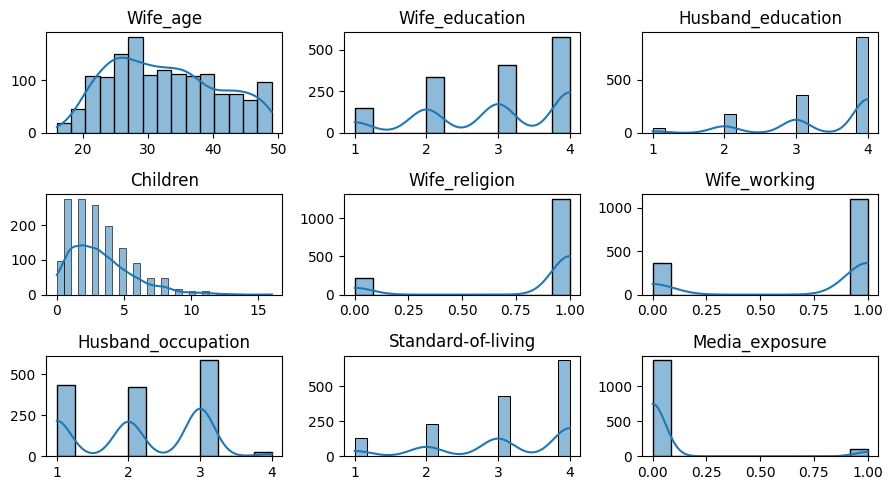

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(9, 5))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=X, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

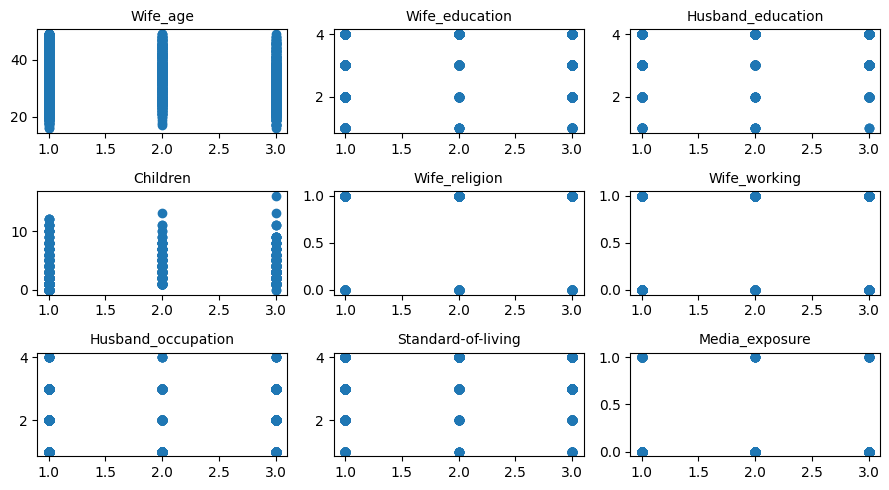

In [15]:
i=1
plt.figure(figsize=(9,5))

for col in X:
    plt.subplot(3,3,i)
    plt.scatter(y,X[col])
    plt.tight_layout()
    plt.title(col,fontsize=10)
    i+=1

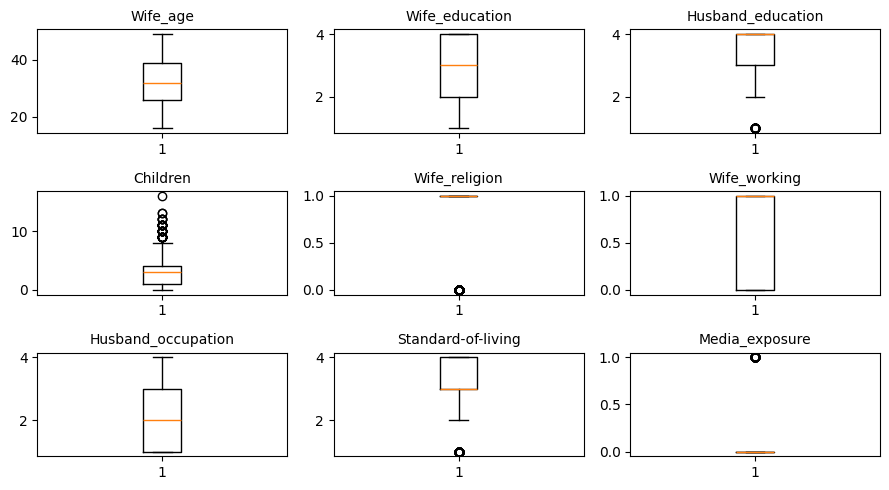

In [16]:

i=1
plt.figure(figsize=(9,5))

for col in columns:
    plt.subplot(3,3,i)
    plt.boxplot(X[col])
    plt.tight_layout()
    plt.title(col,fontsize=10)
    i+=1

<Axes: xlabel='Contraceptive_method'>

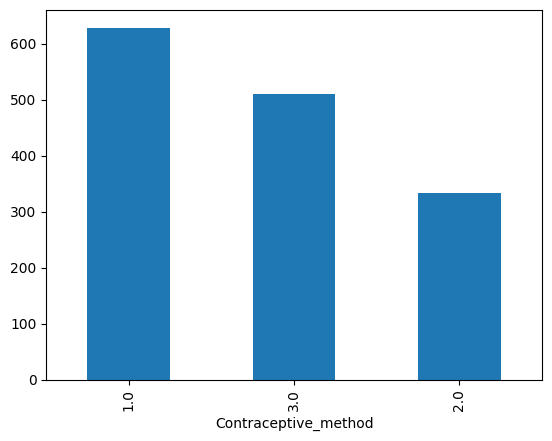

In [17]:

y.value_counts().plot(kind='bar')


# podela na test i train

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Broj uzoraka u trening skupu podataka: {len(X_train)}, {len(y_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(X_test)},  {len(y_test)}")


Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295


# treniranje modela

In [19]:
# Treniranje Random Forest modela sa 500 stabala
rf_model = RandomForestClassifier(n_estimators=500, random_state=123)
rf_model.fit(X_train, y_train)

# Evaluacija modela
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.62      0.66      0.64       130
         2.0       0.45      0.35      0.39        71
         3.0       0.47      0.50      0.48        94

    accuracy                           0.54       295
   macro avg       0.51      0.50      0.51       295
weighted avg       0.53      0.54      0.53       295



In [20]:

# Prikaz karakteristika modela (uključuje broj stabala i važnost atributa)
print(f"Broj stabala u šumi: {len(rf_model.estimators_)}")
print(f"Važnost atributa:\n{rf_model.feature_importances_}")

Broj stabala u šumi: 500
Važnost atributa:
[0.34370789 0.08500404 0.06825989 0.23146705 0.0351672  0.04735694
 0.08390844 0.08794971 0.01717884]


In [21]:
result = {}

In [22]:

# Evaluacija modela
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
result['RF'] = accuracy
# Ispis rezultataa
print(f"Tačnost: {accuracy:.4f}")

Tačnost: 0.5356


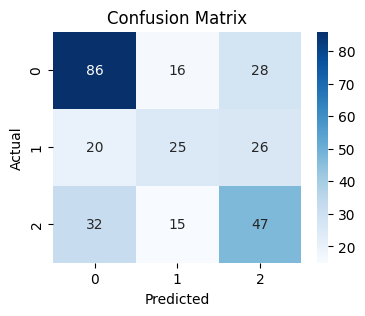

In [23]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

         1.0       0.64      0.67      0.65       130
         2.0       0.49      0.39      0.44        71
         3.0       0.48      0.52      0.50        94

    accuracy                           0.56       295
   macro avg       0.54      0.53      0.53       295
weighted avg       0.55      0.56      0.55       295

Tačnost: 0.5559


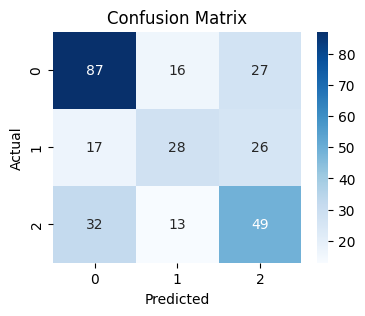

In [24]:

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print(classification_report(y_test, prediction))

# Evaluacija modela
conf_matrix = confusion_matrix(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)
result['KNN'] = accuracy
# Ispis rezultataa
print(f"Tačnost: {accuracy:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:


def primeniModel(features, target, modelName):
    X_train,X_test,y_train,y_test = train_test_split(features, target,test_size=0.2,random_state=42)
    # train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

    print(f"Broj uzoraka u trening skupu podataka: {len(X_train)}, {len(y_train)}")
    print(f"Broj uzoraka u test skupu podataka: {len(X_test)},  {len(y_test)}")

    # Treniranje Random Forest modela sa 500 stabala
    rf_model = RandomForestClassifier(n_estimators=500, random_state=123)
    rf_model.fit(X_train, y_train)

    # Evaluacija modela
    y_pred = rf_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Evaluacija modela
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    result['RF '+modelName] = accuracy


    knn_model = KNeighborsClassifier(n_neighbors=4)
    knn_model.fit(X_train, y_train)

    # Evaluacija modela
    knn_y_pred = knn_model.predict(X_test)
    print(classification_report(y_test, knn_y_pred))

    # Evaluacija modela
    knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
    knn_accuracy = accuracy_score(y_test, knn_y_pred)

    result['KNN '+modelName] = knn_accuracy


    # Ispis rezultataa
    print(f"RF Tačnost: {accuracy:.4f}")
    print(f"KNN Tačnost: {knn_accuracy:.4f}")

    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('RFConfusion Matrix')
    plt.show()

    plt.figure(figsize=(4, 3))
    sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('KNN Confusion Matrix')
    plt.show()

# moving average

In [26]:
X1 = X.copy()

for col in X1:

    window_size = 50
    moving_avg = np.convolve(X[col], np.ones(window_size)/window_size, mode='same')
    X1[col] = moving_avg



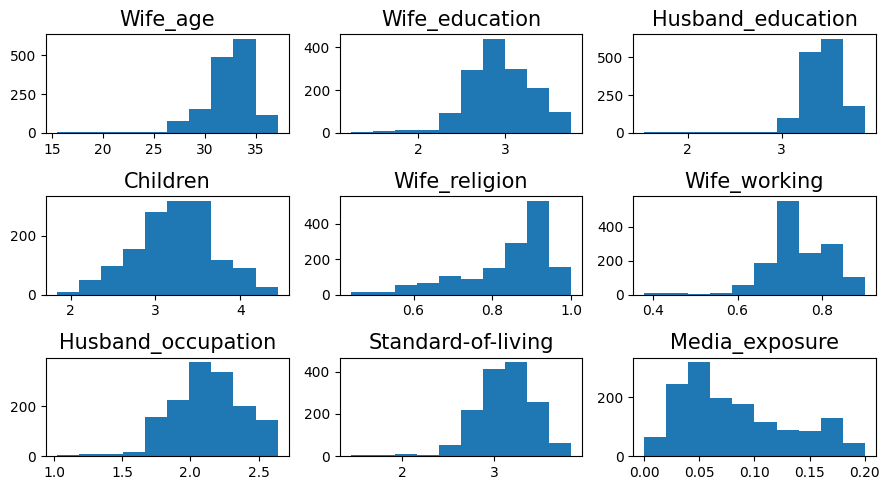

In [27]:
i=1
plt.figure(figsize=(9, 5))

for col in columns:
    plt.subplot(3,3,i)
    plt.hist(X1[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98       130
         2.0       1.00      0.94      0.97        71
         3.0       1.00      1.00      1.00        94

    accuracy                           0.99       295
   macro avg       0.99      0.98      0.99       295
weighted avg       0.99      0.99      0.99       295

              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96       130
         2.0       0.98      0.92      0.95        71
         3.0       1.00      0.94      0.97        94

    accuracy                           0.96       295
   macro avg       0.97      0.95      0.96       295
weighted avg       0.96      0.96      0.96       295

RF Tačnost: 0.9864
KNN Tačnost: 0.9593


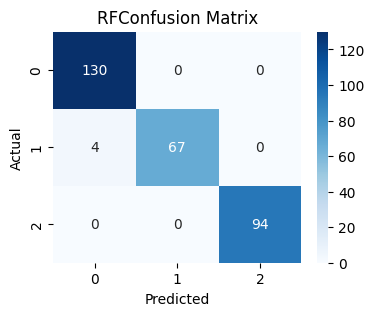

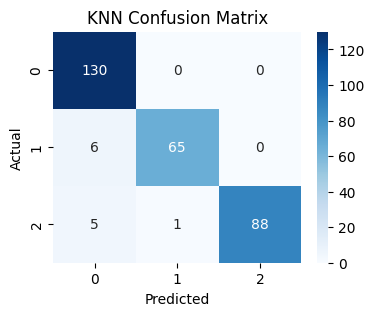

In [28]:
primeniModel(X1,y, "Moving Average")

# median filter

Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92       130
         2.0       0.92      0.79      0.85        71
         3.0       0.93      0.95      0.94        94

    accuracy                           0.91       295
   macro avg       0.91      0.89      0.90       295
weighted avg       0.91      0.91      0.91       295

              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92       130
         2.0       0.92      0.80      0.86        71
         3.0       0.93      0.94      0.93        94

    accuracy                           0.91       295
   macro avg       0.91      0.90      0.90       295
weighted avg       0.91      0.91      0.91       295

RF Tačnost: 0.9085
KNN Tačnost: 0.9085


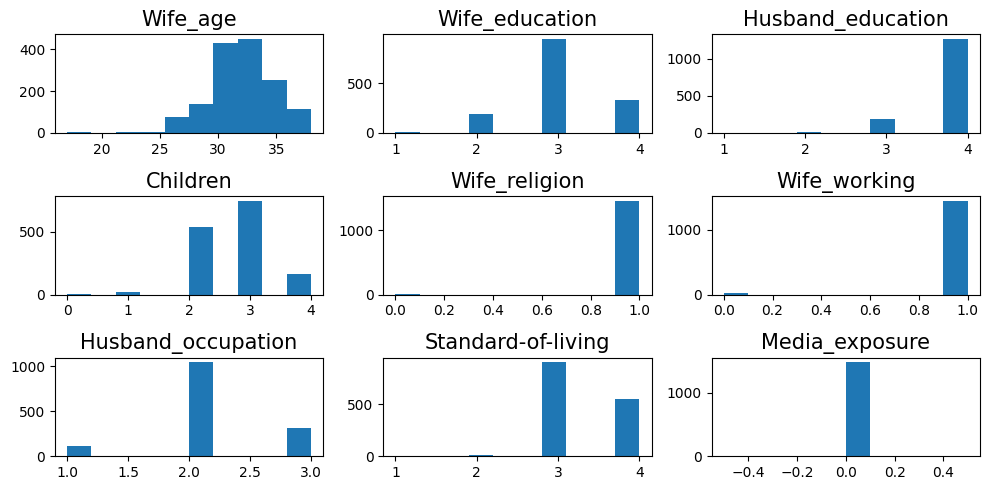

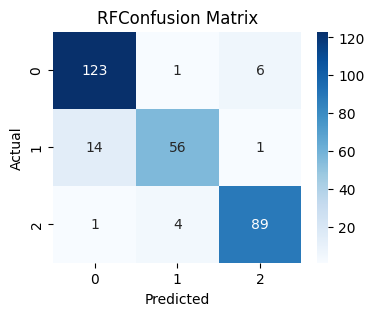

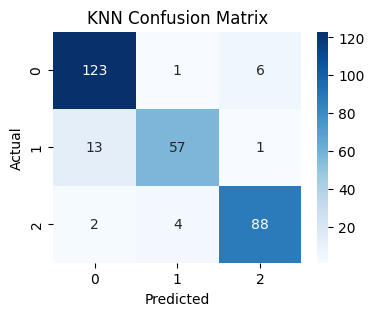

In [29]:
X2 = X.copy()

for col in X2:

    window_size = 50
    moving_avg = medfilt(X[col], kernel_size=51)
    X2[col] = moving_avg

i=1
plt.figure(figsize=(10,5))

for col in columns:
    plt.subplot(3,3,i)
    plt.hist(X2[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

primeniModel(X2, y, "Median filter")

# Kalaman filter

Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.75      0.80      0.78       130
         2.0       0.61      0.48      0.54        71
         3.0       0.52      0.56      0.54        94

    accuracy                           0.65       295
   macro avg       0.63      0.61      0.62       295
weighted avg       0.65      0.65      0.64       295

              precision    recall  f1-score   support

         1.0       0.65      0.72      0.68       130
         2.0       0.54      0.52      0.53        71
         3.0       0.52      0.46      0.49        94

    accuracy                           0.59       295
   macro avg       0.57      0.57      0.57       295
weighted avg       0.58      0.59      0.59       295

RF Tačnost: 0.6475
KNN Tačnost: 0.5898


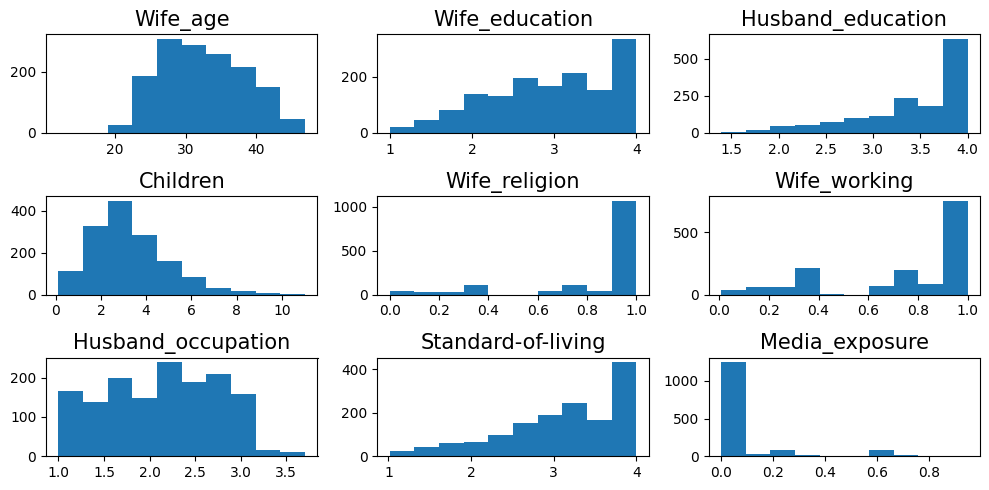

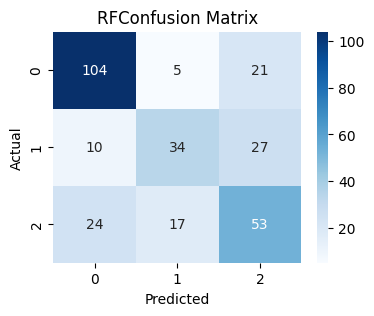

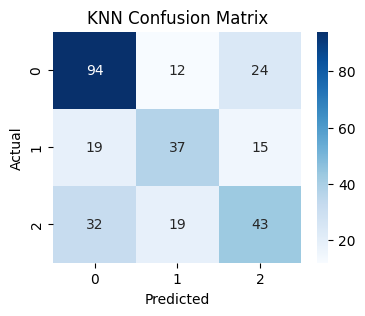

In [30]:
X3 = X.copy()

for col in X3:

    kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
    new_val, _ = kf.filter(X[col])
    X3[col] = new_val

i=1
plt.figure(figsize=(10, 5))

for col in columns:
    plt.subplot(3,3,i)
    plt.hist(X3[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

primeniModel(X3, y,"Kalaman filter")


# fourier transform

In [31]:

def apply_fft_to_columns(df, cutoff_frequency=2):
    
    df_filtered = df.copy()
    
    num_rows = len(df)
    time = np.linspace(0, 10, num_rows)  # Assuming a time range from 0 to 10

    for col in df.columns:
        # Apply FFT on the column
        fft_vals = fft(df[col].values )
        
        fft_freq = np.fft.fftfreq(num_rows, time[1] - time[0])
        
        # # Apply a low-pass filter (zero out frequencies higher than cutoff_frequency)
        fft_vals[np.abs(fft_freq) > cutoff_frequency] = 0
        
        # # Apply Inverse FFT to get the filtered signal
        filtered_vals = ifft(fft_vals)
        
        # # Update the column in the DataFrame with the real part of the filtered signal
        df_filtered[col] = filtered_vals.real
    
    return df_filtered

X4 = apply_fft_to_columns(X)

print(X4.head())


    Wife_age  Wife_education  Husband_education  Children  Wife_religion  \
0  32.532093        2.617485           3.140377  3.678161       0.896303   
1  32.689955        2.598509           3.131611  3.685508       0.906282   
2  32.851413        2.580284           3.123523  3.692122       0.915957   
3  33.015883        2.562882           3.116135  3.697900       0.925293   
4  33.182757        2.546374           3.109470  3.702741       0.934257   

   Wife_working  Husband_occupation  Standard-of-living  Media_exposure  
0      0.695911            2.090216            3.274514        0.099235  
1      0.696313            2.097800            3.248095        0.100206  
2      0.696868            2.105991            3.221302        0.101074  
3      0.697570            2.114720            3.194223        0.101840  
4      0.698413            2.123915            3.166950        0.102502  


Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       130
         2.0       1.00      0.97      0.99        71
         3.0       1.00      1.00      1.00        94

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       130
         2.0       0.99      0.99      0.99        71
         3.0       1.00      0.99      0.99        94

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295

RF Tačnost: 0.9932
KNN Tačnost: 0.9932


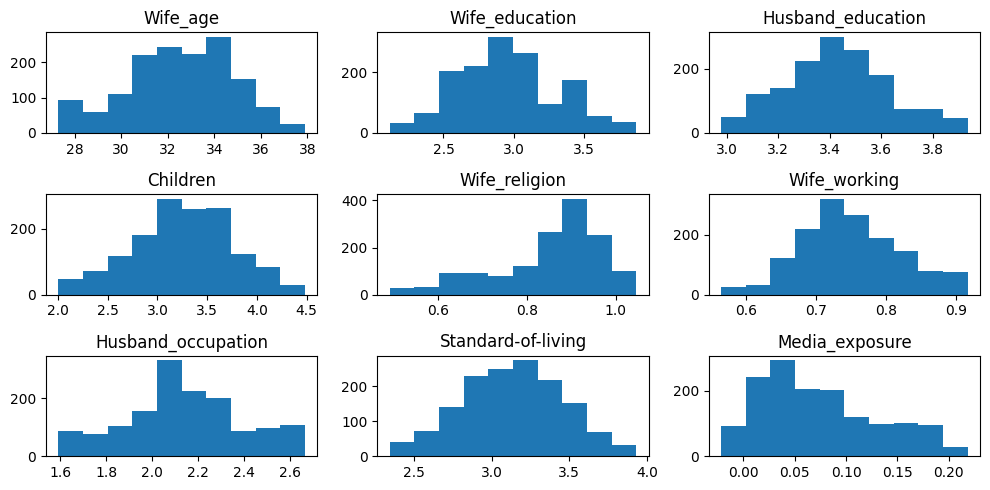

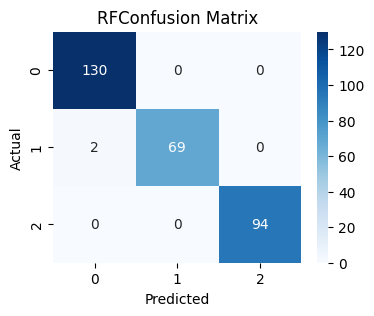

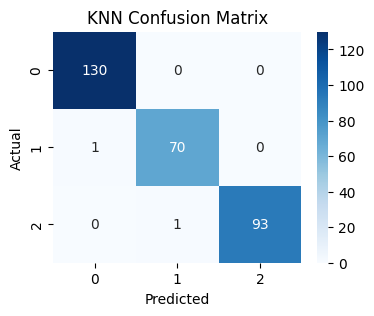

In [32]:

i=1
plt.figure(figsize=(10, 5))

for col in columns:
    plt.subplot(3,3,i)
    plt.hist(X4[col])
    plt.tight_layout()
    plt.title(col,fontsize=12)
    i+=1

primeniModel(X4, y, "Fourier")

# Welvet transform

Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       130
         2.0       1.00      0.89      0.94        71
         3.0       0.93      1.00      0.96        94

    accuracy                           0.97       295
   macro avg       0.97      0.96      0.96       295
weighted avg       0.97      0.97      0.97       295

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       130
         2.0       0.94      0.94      0.94        71
         3.0       0.96      0.95      0.95        94

    accuracy                           0.96       295
   macro avg       0.96      0.96      0.96       295
weighted avg       0.96      0.96      0.96       295

RF Tačnost: 0.9695
KNN Tačnost: 0.9593


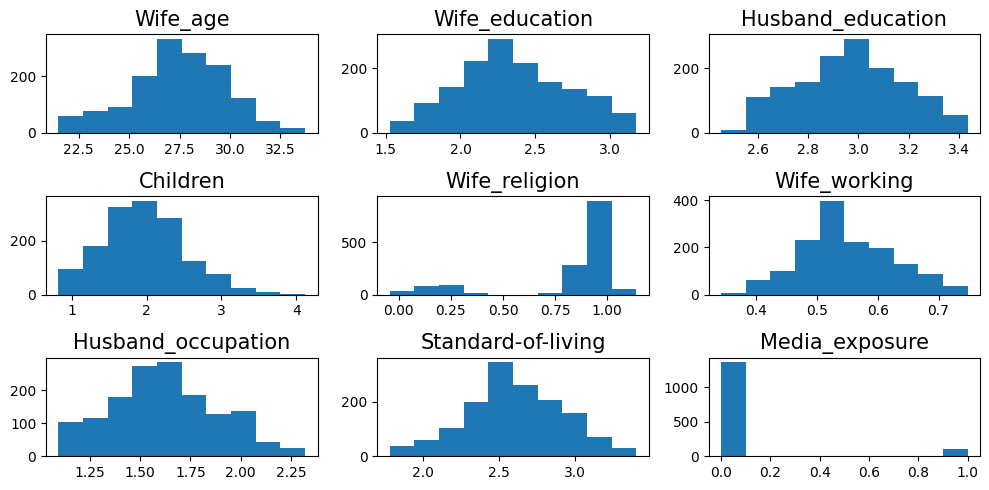

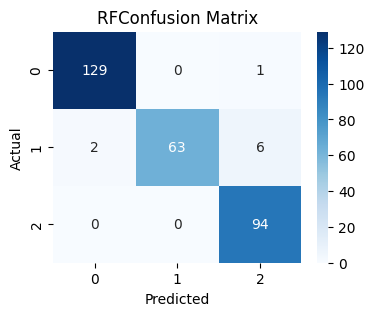

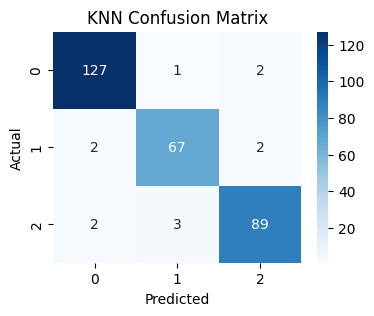

In [33]:
X5 = X.copy()

for col in X5:
    if(col != 'Media_exposure'):
        wavelet = 'db4'
        coeffs = pywt.wavedec(X5[col], wavelet, level=5)
        threshold = np.sqrt(2 * np.log(len(X5[col]))) * np.median(np.abs(coeffs[-1])) / 0.6745
        coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
        wavelet_denoised = pywt.waverec(coeffs, wavelet)

        if len(wavelet_denoised) > len(X5[col]):
            wavelet_denoised = wavelet_denoised[:len(X5[col])]
        elif len(wavelet_denoised) < len(X5[col]):
            wavelet_denoised = np.pad(wavelet_denoised, (0, len(X5[col]) - len(wavelet_denoised)), 'constant')

        X5[col] = wavelet_denoised


i=1
plt.figure(figsize=(10, 5))

for col in columns:
    plt.subplot(3,3,i)
    plt.hist(X5[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

primeniModel(X5, y, "Welvet")


# Savitzky-Golay Filter

Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       130
         2.0       0.99      0.96      0.97        71
         3.0       0.99      0.99      0.99        94

    accuracy                           0.99       295
   macro avg       0.99      0.98      0.98       295
weighted avg       0.99      0.99      0.99       295

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       130
         2.0       0.91      0.96      0.93        71
         3.0       0.98      0.93      0.95        94

    accuracy                           0.96       295
   macro avg       0.95      0.96      0.95       295
weighted avg       0.96      0.96      0.96       295

RF Tačnost: 0.9864
KNN Tačnost: 0.9593


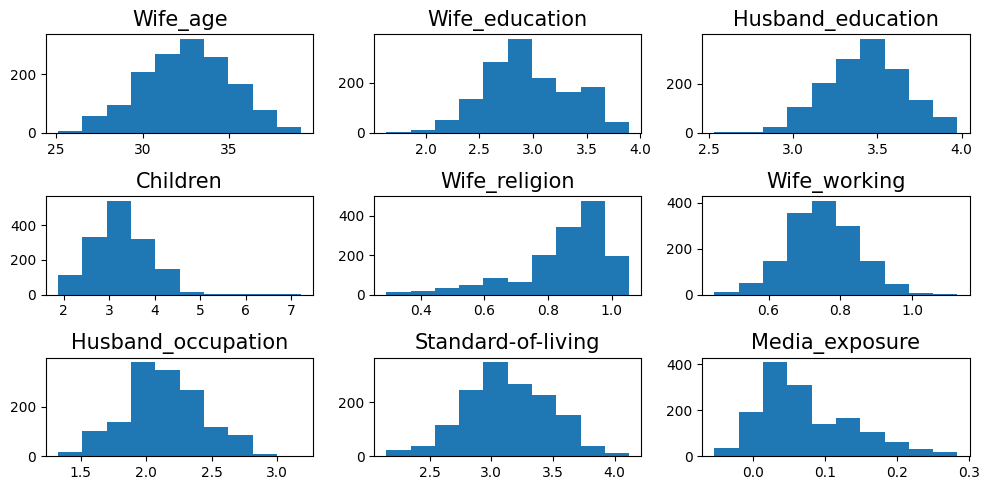

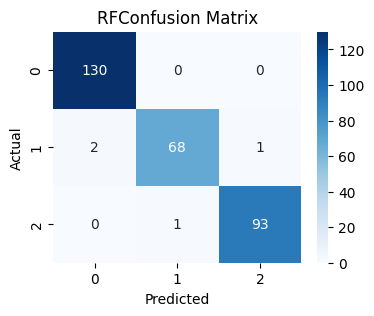

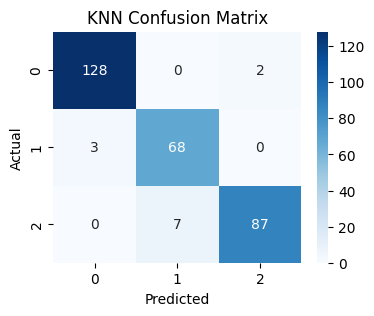

In [34]:
X6 = X.copy()

for col in X6:
    X6[col] =  savgol_filter(X[col], window_length=51, polyorder=3)

i=1
plt.figure(figsize=(10, 5))

for col in columns:
    plt.subplot(3,3,i)
    plt.hist(X6[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

primeniModel(X6, y, "Savgol")

# PCA


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

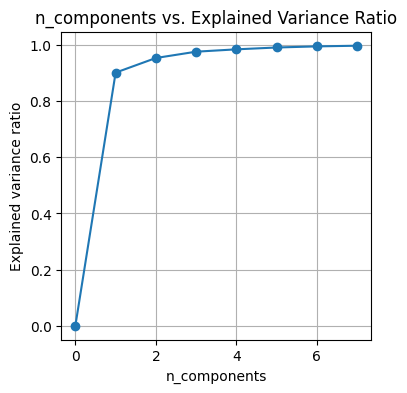

In [35]:
nums = np.arange(8)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,4))
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Broj uzoraka u trening skupu podataka: 1178, 1178
Broj uzoraka u test skupu podataka: 295,  295
              precision    recall  f1-score   support

         1.0       0.63      0.64      0.64       130
         2.0       0.51      0.32      0.40        71
         3.0       0.41      0.52      0.46        94

    accuracy                           0.53       295
   macro avg       0.52      0.49      0.50       295
weighted avg       0.53      0.53      0.52       295

              precision    recall  f1-score   support

         1.0       0.62      0.69      0.66       130
         2.0       0.56      0.48      0.52        71
         3.0       0.47      0.45      0.46        94

    accuracy                           0.56       295
   macro avg       0.55      0.54      0.54       295
weighted avg       0.56      0.56      0.56       295

RF Tačnost: 0.5254
KNN Tačnost: 0.5627


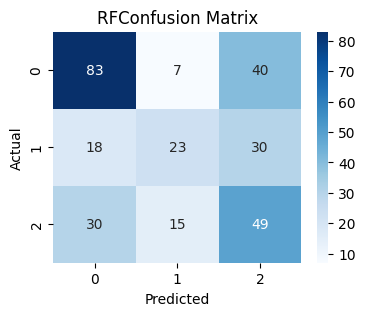

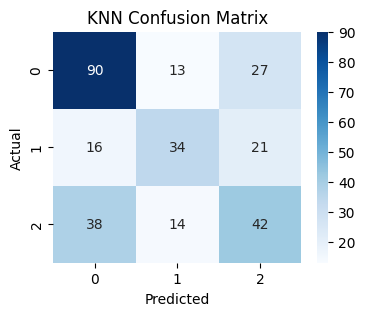

In [36]:
pca = PCA(n_components=3)
data_features_pca = pca.fit_transform(X)

data_train_pca, data_test_pca, target_train_pca, target_test_pca = train_test_split(data_features_pca, y, test_size=0.2, random_state=42)

primeniModel(data_features_pca, y,"PCA")

# Result

In [37]:

pd.DataFrame(result.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
9,KNN Fourier,0.993220
8,RF Fourier,0.993220
2,RF Moving Average,0.986441
12,RF Savgol,0.986441
10,RF Welvet,0.969492
3,KNN Moving Average,0.959322
13,KNN Savgol,0.959322
11,KNN Welvet,0.959322
4,RF Median filter,0.908475
5,KNN Median filter,0.908475
